# Data Loader - Predictor de Precios de Casas

Este notebook contiene las funciones para cargar, explorar y preparar los datos del proyecto.

## 1. Importar librerías

In [1]:
import pandas as pd
import sys
import os

# Agregar el directorio padre al path para importar config
sys.path.append(os.path.abspath('..'))

from config import RAW_DATA_FILE, FEATURES, TARGET

## 2. Cargar datos

In [2]:
def load_data():
    """Carga los datos desde el CSV"""
    print("Cargando datos...")
    df = pd.read_csv(RAW_DATA_FILE)
    df.columns = df.columns.str.strip()
    print(f"✓ Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
    return df

In [3]:
# Cargar los datos
df = load_data()
df.head()

Cargando datos...
✓ Datos cargados: 20 filas, 6 columnas


,tamano_m2,habitaciones,banos,edad_anos,distancia_centro_km,precio
0,85,2,1,15,8.5,180000
1,120,3,2,5,3.2,320000
2,95,2,1,20,12.0,195000
3,150,4,3,2,2.5,450000
4,110,3,2,10,5.8,280000


## 3. Explorar datos

In [4]:
def explore_data(df):
    """Muestra información básica del dataset"""
    print("\n=== EXPLORACIÓN DE DATOS ===")
    print("\nPrimeras filas:")
    print(df.head())
    
    print("\nInformación:")
    print(df.info())
    
    print("\nEstadísticas:")
    print(df.describe())
    
    print("\nValores faltantes:")
    print(df.isnull().sum())
    
    return df

In [5]:
# Explorar los datos
df = explore_data(df)


=== EXPLORACIÓN DE DATOS ===

Primeras filas:
   tamano_m2  habitaciones  banos  edad_anos  distancia_centro_km  precio
0         85             2      1         15                  8.5  180000
1        120             3      2          5                  3.2  320000
2         95             2      1         20                 12.0  195000
3        150             4      3          2                  2.5  450000
4        110             3      2         10                  5.8  280000

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tamano_m2            20 non-null     int64  
 1   habitaciones         20 non-null     int64  
 2   banos                20 non-null     int64  
 3   edad_anos            20 non-null     int64  
 4   distancia_centro_km  20 non-null     float64
 5   precio               20 non-null     i

### Información detallada del DataFrame

In [6]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tamano_m2            20 non-null     int64  
 1   habitaciones         20 non-null     int64  
 2   banos                20 non-null     int64  
 3   edad_anos            20 non-null     int64  
 4   distancia_centro_km  20 non-null     float64
 5   precio               20 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


### Estadísticas descriptivas

In [7]:
# Estadísticas descriptivas
df.describe()

,tamano_m2,habitaciones,banos,edad_anos,distancia_centro_km,precio
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,121.00000,2.950000,2.050000,11.450000,6.890000,317500.000000
std,38.58006,1.050063,0.887041,8.338086,4.729182,144663.857196
min,70.00000,1.000000,1.000000,1.000000,1.800000,145000.000000
25%,93.75000,2.000000,1.000000,4.750000,3.100000,192500.000000
50%,112.50000,3.000000,2.000000,9.500000,5.650000,287500.000000
75%,142.50000,3.250000,3.000000,16.500000,9.400000,390000.000000
max,200.00000,5.000000,4.000000,30.000000,18.000000,620000.000000


### Verificar valores faltantes

In [8]:
# Valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores faltantes: {df.isnull().sum().sum()}")

Valores faltantes por columna:
tamano_m2              0
habitaciones           0
banos                  0
edad_anos              0
distancia_centro_km    0
precio                 0
dtype: int64

Total de valores faltantes: 0


## 4. Preparar datos

In [9]:
def prepare_data(df):
    """Separa características (X) y objetivo (y)"""
    X = df[FEATURES]
    y = df[TARGET]
    return X, y

In [10]:
# Preparar los datos
X, y = prepare_data(df)

print(f"Características (X): {X.shape}")
print(f"Objetivo (y): {y.shape}")

Características (X): (20, 5)
Objetivo (y): (20,)


### Visualizar características

In [11]:
# Mostrar las primeras filas de las características
X.head()

,tamano_m2,habitaciones,banos,edad_anos,distancia_centro_km
0,85,2,1,15,8.5
1,120,3,2,5,3.2
2,95,2,1,20,12.0
3,150,4,3,2,2.5
4,110,3,2,10,5.8


### Visualizar objetivo

In [12]:
# Mostrar las primeras filas del objetivo
y.head()

0    180000
1    320000
2    195000
3    450000
4    280000
Name: precio, dtype: int64

## 5. Análisis adicional

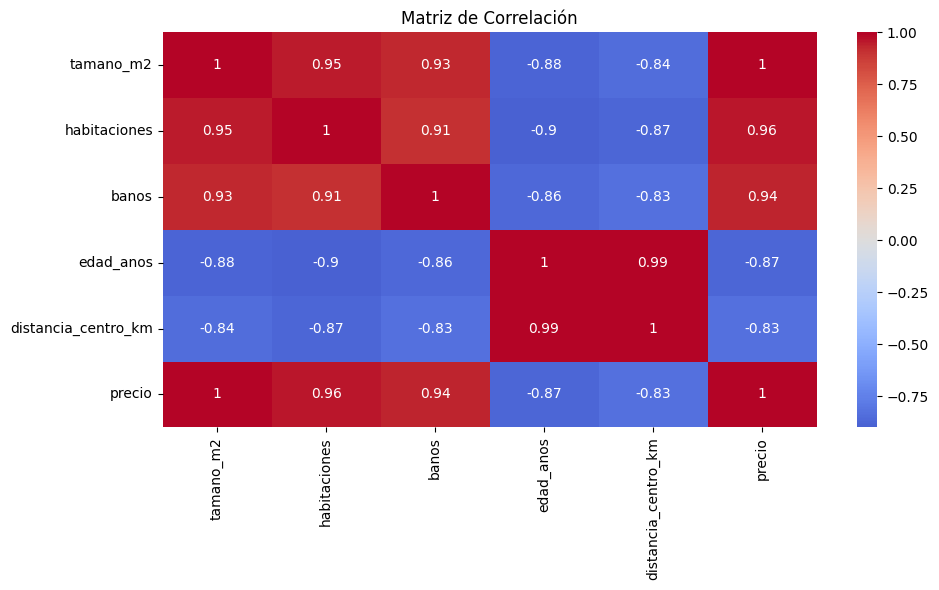

In [13]:
# Correlación entre características y el objetivo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation = df[FEATURES + [TARGET]].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

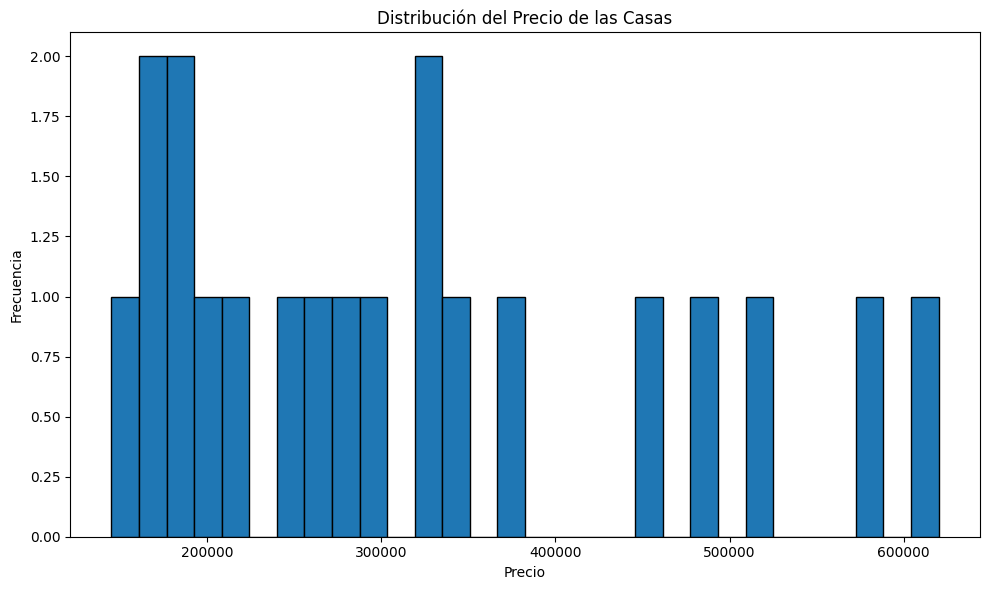

In [14]:
# Distribución del precio (objetivo)
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución del Precio de las Casas')
plt.tight_layout()
plt.show()